<a href="https://colab.research.google.com/github/eniofv/prev_acao_deep_learning/blob/master/Avaliacao_dados_acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_datareader import data as web
import warnings
warnings.filterwarnings("ignore")



In [ ]:
DATA_INICIAL = '01/01/2010'
DATA_FINAL = '16/07/2020'

In [ ]:
precos = pd.DataFrame()
portifolio = ['BBDC4.SA','ITUB4.SA','PETR4.SA','VALE3.SA']
for acao in portifolio:
    precos[acao] = web.get_data_yahoo(acao,DATA_INICIAL,DATA_FINAL)['Adj Close']

Período 01/01/2010-16/07/2020


,BBDC4.SA,ITUB4.SA,PETR4.SA,VALE3.SA
count,2579.000000,2573.000000,2552.000000,2579.000000
mean,15.472678,17.921529,17.450668,31.366980
std,8.227745,8.340982,6.103848,11.766960
min,6.925451,8.056333,3.896351,7.664479
25%,9.056872,11.317145,13.302196,24.058539
50%,11.874986,14.004777,16.815495,29.424637
75%,21.013890,24.093155,21.808308,38.969608
max,37.261490,37.359451,31.346632,61.790001


In [ ]:
precos.rename(columns ={'VALE3.SA':'VALE3', 'ITUB4.SA':'ITUB4','BBDC4.SA':'BBDC4','PETR4.SA':'PETR4'},inplace = True)

precos.reset_index(inplace = True)

In [ ]:
print('Período ' + DATA_INICIAL + '-'+DATA_FINAL)
precos.describe()

Período 01/01/2010-16/07/2020


,BBDC4,ITUB4,PETR4,VALE3
count,2579.000000,2573.000000,2552.000000,2579.000000
mean,15.472678,17.921529,17.450668,31.366980
std,8.227745,8.340982,6.103848,11.766960
min,6.925451,8.056333,3.896351,7.664479
25%,9.056872,11.317145,13.302196,24.058539
50%,11.874986,14.004777,16.815495,29.424637
75%,21.013890,24.093155,21.808308,38.969608
max,37.261490,37.359451,31.346632,61.790001


In [ ]:
portifolio = list(precos.drop(['Date'], axis = 1).columns)
portifolio


['BBDC4', 'ITUB4', 'PETR4', 'VALE3']

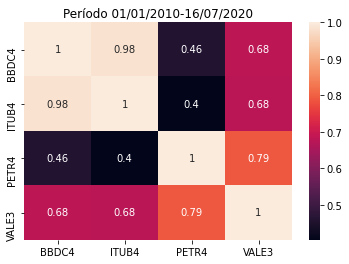

In [ ]:
sns.heatmap(precos.corr(), annot = True)
plt.title('Período ' + DATA_INICIAL + '-'+DATA_FINAL)
plt.show()

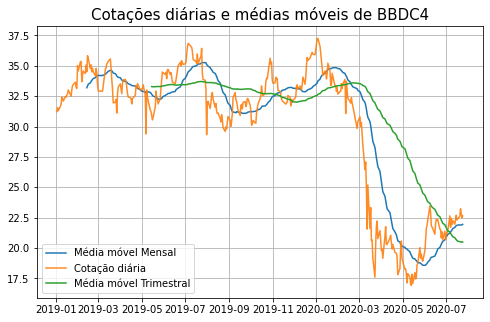

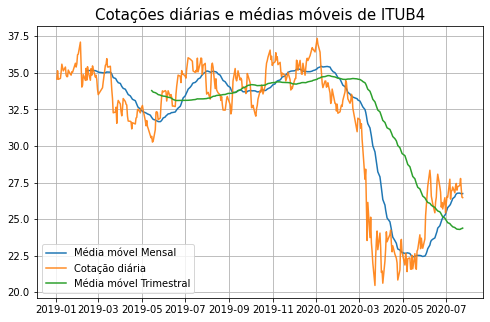

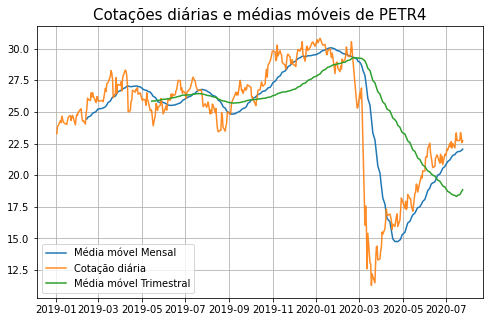

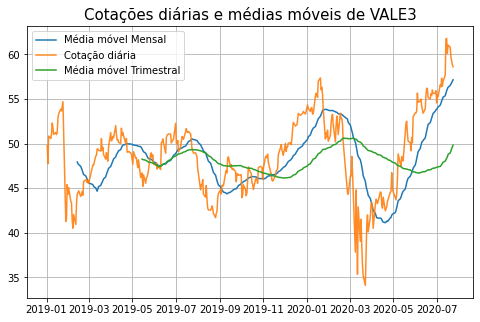

In [ ]:
def imprime_media_movel(acao):
    plt.figure(figsize=(8,5))
    plt.plot(precos['Date'],precos[acao].rolling(window = 30).mean()) 
    plt.plot(precos['Date'],precos[acao], alpha = 0.9)
    plt.plot(precos['Date'],precos[acao].rolling(window = 90).mean())
    plt.grid()
    plt.title('Cotações diárias e médias móveis de ' + acao, fontsize = 15)
    plt.legend(['Média móvel Mensal','Cotação diária','Média móvel Trimestral'])
    plt.show()

for acao in portifolio:
    imprime_media_movel(acao)